# Transient space-charge-limited current with trapping

This example shows how to run transient simulation of space-charge-limited diode. It considers a case of investigated in a classical [paper](https://doi.org/10.1103/PhysRev.126.1980). 

In the reference, an idealized case of time-dependent space-charge-limited current is considered. The diffusion is neglected, and the release of trapped charge carriers is not taken into account. The sample is assumed to be insulating and free of mobile or trapped charges at time zero. The contacts are assumed to be ohmic, and the conduction is unipolar.

It is shown that under these assumptions, transient current will have a distinct peak at a time proportional to transit time $t_{peak} \approx 0.786 \frac{L^2}{\mu V}$, with $L$ being the sample thickness, $\mu$ the charge carrier mobility, and $V$ the applied voltage. Remarkably, the position of peak is shown to be almost not affected by the trapping process. This motivates the use of transient SCL experiment as a reliable contact test, and as a method to measure mobility.

`oedes` cannot reproduce Fig. 5 from the reference exactly, because it always includes diffusion for numerical reasons. In this example, the influence of diffusion is reduced by setting temperature to a low value (1 K), and by using relatively high voltage and device thickness. Attempts to further reduce the diffusion will eventually lead to numerical problems.

The trapping model model must include detrapping, therefore very deep trap level (-1 eV) with very high concentration are used to simulate "trap only" trapping level. Trapping rate is set corresponding to the trapping time.

The features of transient signal can be made more similar to the paper by using more precise integration in time. This reduces the amount of numerical dissipation.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from oedes import *
init_notebook()

## Model and parameters

In [2]:
L = 1e-6
voltage = 1e3
mu = 1e-15
epsilon_r = 1.
params = {
    'T': 1,
    'electrode0.workfunction': 0,
    'electrode1.workfunction': 0,
    'hole.level': 0,
    'hole.mu': mu,
    'hole.N0': 1e27,
    'electrode0.voltage': voltage,
    'electrode1.voltage': 0,
    'epsilon_r': epsilon_r,
    'hole.trap.level': -1.,
    'hole.trap.trate': 0.,
    'hole.trap.N0': 1e30
}

Stock unipolar model is used:

In [3]:
model = models.std.holeonly(L, traps=['trap'])

### Normalization

We use the normalization of axes introduced in the reference:

In [4]:
t0 = functions.physics.ManyRakavy(
    mu, voltage, L) / functions.physics.ManyRakavy_t1
j0 = functions.physics.MottGurney(epsilon_r, mu, voltage, L)

### Accuracy

Decreasing tolerance below improves the shape of responses, at the expense of increased number of timesteps.

In [5]:
reltol = 1e-5  # decrease to increase quality and runtime

## Result

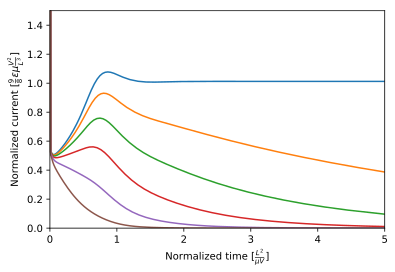

In [6]:
for tau in progressbar([1e100, 5, 2, 1., 0.5, 0.25],desc='tau'):
    params['hole.trap.trate'] = 1. / (tau * params['hole.trap.N0'])
    c = context(model)
    c.transient(params, 5, 1e-1, reltol=reltol)
    t, j = c.teval('time', 'J')
    plt.plot(t / t0, j / j0, label=tau)
    testing.store(j, rtol=1e-5)
plt.ylim([0, 1.5])
plt.xlim([0, 5])
plt.xlabel(r'Normalized time [$\frac{L^2}{\mu V}$]')
plt.ylabel(
    r'Normalized current [$\frac{9}{8}\varepsilon \mu \frac{V^2}{L^3}$]')
plt.show()

## Reference

A. Many and G. Rakavy [Theory of Transient Space-Charge-Limited Currents in Solids in the Presence of Trapping](https://doi.org/10.1103/PhysRev.126.1980), Phys. Rev. 126, 1980 (1962)


---
This file is a part of __oedes__, an open source organic electronic device 
simulator. For more information, see <https://www.github.com/mzszym/oedes>.
